In [1]:
# ----------------------------
# Data Manipulation Libraries
# ----------------------------
import os
import re
import ast
from datetime import datetime
import pandas as pd
import numpy as np

# ----------------------------
# Random Data Generation
# ----------------------------
import random

# ----------------------------
# Natural Language Processing (NLP) Libraries
# ----------------------------
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from textblob import TextBlob
import string

# Download necessary NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# ----------------------------
# Topic Modeling Libraries
# ----------------------------
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models

# ----------------------------
# Feature Extraction & Vectorization
# ----------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

# ----------------------------
# Visualization Libraries
# ----------------------------
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from wordcloud import WordCloud

# ----------------------------
# Additional Settings and Utilities
# ----------------------------
import warnings
warnings.filterwarnings("ignore")
import hashlib

# ----------------------------
# Advanced NLP & Machine Learning Libraries
# ----------------------------
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

# ----------------------------
# Deep Learning Libraries
# ----------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from transformers import BertTokenizer, BertModel

# ----------------------------
# Machine Learning Utility Libraries
# ----------------------------
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Read Datasets

In [2]:
# Read the file into a DataFrame
pure_gym = pd.read_csv(r'Results/Google_Map_Reviews_for_puregym_addresses.csv')

In [3]:
def anonymize_username(username):
    if pd.isna(username):
        return None
    return hashlib.sha256(username.encode()).hexdigest()[:10]

pure_gym["Username"] = pure_gym["Username"].apply(anonymize_username)
pure_gym

,Search Query,CSV Address,Merchant Address,Latitude,Longitude,Username,Review,Rating,Review Time,Reply,Reply Time,Likes
0,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",NaN,NaN,eaa1bd20e8,Gym its ok but a water machine not working lik...,2,6 months ago,No reply,No date,0
1,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",NaN,NaN,b87fe80911,"It's fine, everything you need for a standard ...",3,5 months ago,No reply,No date,0
2,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",NaN,NaN,093de0b0ee,"This gym used to be good, now its absolutely f...",1,a month ago,"Hi Lauren, thank you for taking the time to le...",3 weeks ago,0
3,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",NaN,NaN,3f7513acad,When you’re fixing the water fountain ? At thi...,1,6 months ago,No reply,No date,0
4,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",NaN,NaN,868e2638e3,"Went yesterday, Saturday 15/3, at 21.17 and th...",1,5 days ago,"Hi Paolo, thanks for leaving us this review. W...",4 days ago,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100718,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",53.993308,-1.096852,88dabdbf56,No review text,5,7 years ago,No reply,No date,0
100719,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",53.993308,-1.096852,7d2c16836f,No review text,5,7 years ago,No reply,No date,0
100720,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",53.993308,-1.096852,431a0066b4,No review text,3,7 years ago,No reply,No date,0
100721,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",53.993308,-1.096852,dd3f74a7d5,No review text,4,7 years ago,No reply,No date,0


# Data Cleaning

### Remove the latitude and longitude columns and the no-review rows.

In [4]:
# Remove xy columns
pure_gym = pure_gym.drop(columns=["Latitude", "Longitude"])

# Remove no review rows
pure_gym = pure_gym[~pure_gym["Review"].fillna("").str.strip().isin(["", "No review text"])]
pure_gym

,Search Query,CSV Address,Merchant Address,Username,Review,Rating,Review Time,Reply,Reply Time,Likes
0,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",eaa1bd20e8,Gym its ok but a water machine not working lik...,2,6 months ago,No reply,No date,0
1,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",b87fe80911,"It's fine, everything you need for a standard ...",3,5 months ago,No reply,No date,0
2,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",093de0b0ee,"This gym used to be good, now its absolutely f...",1,a month ago,"Hi Lauren, thank you for taking the time to le...",3 weeks ago,0
3,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",3f7513acad,When you’re fixing the water fountain ? At thi...,1,6 months ago,No reply,No date,0
4,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",868e2638e3,"Went yesterday, Saturday 15/3, at 21.17 and th...",1,5 days ago,"Hi Paolo, thanks for leaving us this review. W...",4 days ago,0
...,...,...,...,...,...,...,...,...,...,...
100542,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",8fd905038a,Great place to go to,5,7 years ago,No reply,No date,0
100543,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",17c149ae92,My favourite gym.,4,8 years ago,No reply,No date,0
100544,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",347cf1167d,Love it!!,5,3 years ago,"Hi Iuliana! Thanks for your great review, get ...",3 years ago,1
100545,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",82927f51d5,Great gym for price,5,8 years ago,No reply,No date,0


### Remove invalid & duplicate addresses

In [5]:
# List of queries to remove
queries_to_remove = ["PureGym Basingstoke","PureGym Winchester","PureGym Luton Retail Park","PureGym Antrim"]

# Remove rows where 'Search Query' is in the list
pure_gym = pure_gym[~pure_gym["Search Query"].isin(queries_to_remove)]
pure_gym

,Search Query,CSV Address,Merchant Address,Username,Review,Rating,Review Time,Reply,Reply Time,Likes
0,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",eaa1bd20e8,Gym its ok but a water machine not working lik...,2,6 months ago,No reply,No date,0
1,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",b87fe80911,"It's fine, everything you need for a standard ...",3,5 months ago,No reply,No date,0
2,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",093de0b0ee,"This gym used to be good, now its absolutely f...",1,a month ago,"Hi Lauren, thank you for taking the time to le...",3 weeks ago,0
3,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",3f7513acad,When you’re fixing the water fountain ? At thi...,1,6 months ago,No reply,No date,0
4,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",868e2638e3,"Went yesterday, Saturday 15/3, at 21.17 and th...",1,5 days ago,"Hi Paolo, thanks for leaving us this review. W...",4 days ago,0
...,...,...,...,...,...,...,...,...,...,...
100542,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",8fd905038a,Great place to go to,5,7 years ago,No reply,No date,0
100543,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",17c149ae92,My favourite gym.,4,8 years ago,No reply,No date,0
100544,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",347cf1167d,Love it!!,5,3 years ago,"Hi Iuliana! Thanks for your great review, get ...",3 years ago,1
100545,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",82927f51d5,Great gym for price,5,8 years ago,No reply,No date,0


In [6]:
# Filter CSV Addresses with multiple Merchant Addresses
pg_filtered = pure_gym.groupby("CSV Address").filter(
    lambda group: group["Merchant Address"].nunique() == 1
)

# Identify columns to consider for dropping duplicates
columns_to_check = [col for col in pg_filtered.columns if col not in ["Search Query", "CSV Address"]]

# Remove duplicate rows based on the selected columns
pure_gym = pg_filtered.drop_duplicates(subset=columns_to_check)
pure_gym

,Search Query,CSV Address,Merchant Address,Username,Review,Rating,Review Time,Reply,Reply Time,Likes
0,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",eaa1bd20e8,Gym its ok but a water machine not working lik...,2,6 months ago,No reply,No date,0
1,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",b87fe80911,"It's fine, everything you need for a standard ...",3,5 months ago,No reply,No date,0
2,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",093de0b0ee,"This gym used to be good, now its absolutely f...",1,a month ago,"Hi Lauren, thank you for taking the time to le...",3 weeks ago,0
3,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",3f7513acad,When you’re fixing the water fountain ? At thi...,1,6 months ago,No reply,No date,0
4,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",868e2638e3,"Went yesterday, Saturday 15/3, at 21.17 and th...",1,5 days ago,"Hi Paolo, thanks for leaving us this review. W...",4 days ago,0
...,...,...,...,...,...,...,...,...,...,...
100542,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",8fd905038a,Great place to go to,5,7 years ago,No reply,No date,0
100543,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",17c149ae92,My favourite gym.,4,8 years ago,No reply,No date,0
100544,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",347cf1167d,Love it!!,5,3 years ago,"Hi Iuliana! Thanks for your great review, get ...",3 years ago,1
100545,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",82927f51d5,Great gym for price,5,8 years ago,No reply,No date,0


### Covert Time

In [7]:
def adjust_review_time(rt):
    # Convert the input to lowercase for case-insensitive matching.
    rt_lower = rt.lower()
    if "year" in rt_lower:
        # Handle "a year ago" explicitly.
        if "a year" in rt_lower:
            years_ago = 1
        else:
            # Extract the numeric value if present (e.g., "2 years ago").
            match = re.search(r"(\d+)", rt_lower)
            if match:
                years_ago = int(match.group(1))
            else:
                # Fallback in case no number is found.
                years_ago = 1
    else:
        # For any time period that isn't in years, consider it as 0 years ago.
        years_ago = 0
    # Convert the years ago to a specific year (0 -> 2025, 1 -> 2024, 2 -> 2023, etc.)
    return 2025 - years_ago

pure_gym["Adj Review Time"] = pure_gym["Review Time"].apply(adjust_review_time)
pure_gym

,Search Query,CSV Address,Merchant Address,Username,Review,Rating,Review Time,Reply,Reply Time,Likes,Adj Review Time
0,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",eaa1bd20e8,Gym its ok but a water machine not working lik...,2,6 months ago,No reply,No date,0,2025
1,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",b87fe80911,"It's fine, everything you need for a standard ...",3,5 months ago,No reply,No date,0,2025
2,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",093de0b0ee,"This gym used to be good, now its absolutely f...",1,a month ago,"Hi Lauren, thank you for taking the time to le...",3 weeks ago,0,2025
3,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",3f7513acad,When you’re fixing the water fountain ? At thi...,1,6 months ago,No reply,No date,0,2025
4,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",868e2638e3,"Went yesterday, Saturday 15/3, at 21.17 and th...",1,5 days ago,"Hi Paolo, thanks for leaving us this review. W...",4 days ago,0,2025
...,...,...,...,...,...,...,...,...,...,...,...
100542,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",8fd905038a,Great place to go to,5,7 years ago,No reply,No date,0,2018
100543,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",17c149ae92,My favourite gym.,4,8 years ago,No reply,No date,0,2017
100544,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",347cf1167d,Love it!!,5,3 years ago,"Hi Iuliana! Thanks for your great review, get ...",3 years ago,1,2022
100545,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",82927f51d5,Great gym for price,5,8 years ago,No reply,No date,0,2017


In [8]:
# Analysis of review times (as they are provided in a relative format)
review_time_counts = pure_gym['Adj Review Time'].value_counts()
print("\nReview Time distribution:")
print(review_time_counts)


Review Time distribution:
Adj Review Time
2025    10457
2024    10051
2023     7484
2022     5228
2020     4109
2019     3849
2018     3101
2021     1823
2017     1296
2016      199
2015       85
2014       48
2013       32
2012        8
2011        1
Name: count, dtype: int64


In [9]:
# Filter rows where "Adj Review Time" is greater than or equal to 2017
pure_gym = pure_gym[pure_gym["Adj Review Time"] >= 2017]

# Reset the index after filtering
pure_gym.reset_index(drop=True, inplace=True)
pure_gym

,Search Query,CSV Address,Merchant Address,Username,Review,Rating,Review Time,Reply,Reply Time,Likes,Adj Review Time
0,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",eaa1bd20e8,Gym its ok but a water machine not working lik...,2,6 months ago,No reply,No date,0,2025
1,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",b87fe80911,"It's fine, everything you need for a standard ...",3,5 months ago,No reply,No date,0,2025
2,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",093de0b0ee,"This gym used to be good, now its absolutely f...",1,a month ago,"Hi Lauren, thank you for taking the time to le...",3 weeks ago,0,2025
3,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",3f7513acad,When you’re fixing the water fountain ? At thi...,1,6 months ago,No reply,No date,0,2025
4,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",868e2638e3,"Went yesterday, Saturday 15/3, at 21.17 and th...",1,5 days ago,"Hi Paolo, thanks for leaving us this review. W...",4 days ago,0,2025
...,...,...,...,...,...,...,...,...,...,...,...
47393,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",8fd905038a,Great place to go to,5,7 years ago,No reply,No date,0,2018
47394,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",17c149ae92,My favourite gym.,4,8 years ago,No reply,No date,0,2017
47395,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",347cf1167d,Love it!!,5,3 years ago,"Hi Iuliana! Thanks for your great review, get ...",3 years ago,1,2022
47396,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",82927f51d5,Great gym for price,5,8 years ago,No reply,No date,0,2017


In [10]:
# Get the oldest comment in each "Search Query"
pure_gym['Oldest_Review'] = pure_gym.groupby('Search Query')['Adj Review Time'].transform('min')

# Compute "Since Open" as the difference between the oldest comment and the row's review time
pure_gym['Since Open'] = pure_gym['Adj Review Time'] - pure_gym['Oldest_Review']

# Drop the helper columns if no longer needed
pure_gym.drop(columns=['Oldest_Review'], inplace=True)
pure_gym

,Search Query,CSV Address,Merchant Address,Username,Review,Rating,Review Time,Reply,Reply Time,Likes,Adj Review Time,Since Open
0,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",eaa1bd20e8,Gym its ok but a water machine not working lik...,2,6 months ago,No reply,No date,0,2025,8
1,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",b87fe80911,"It's fine, everything you need for a standard ...",3,5 months ago,No reply,No date,0,2025,8
2,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",093de0b0ee,"This gym used to be good, now its absolutely f...",1,a month ago,"Hi Lauren, thank you for taking the time to le...",3 weeks ago,0,2025,8
3,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",3f7513acad,When you’re fixing the water fountain ? At thi...,1,6 months ago,No reply,No date,0,2025,8
4,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",868e2638e3,"Went yesterday, Saturday 15/3, at 21.17 and th...",1,5 days ago,"Hi Paolo, thanks for leaving us this review. W...",4 days ago,0,2025,8
...,...,...,...,...,...,...,...,...,...,...,...,...
47393,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",8fd905038a,Great place to go to,5,7 years ago,No reply,No date,0,2018,1
47394,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",17c149ae92,My favourite gym.,4,8 years ago,No reply,No date,0,2017,0
47395,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",347cf1167d,Love it!!,5,3 years ago,"Hi Iuliana! Thanks for your great review, get ...",3 years ago,1,2022,5
47396,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",82927f51d5,Great gym for price,5,8 years ago,No reply,No date,0,2017,0


In [11]:
# Check reply status (flag reviews with or without replies)
pure_gym['Reply Status'] = pure_gym['Reply'].apply(lambda x: '1' if x != "No reply" else "0")
reply_counts = pure_gym['Reply Status'].value_counts()

# Remove Old time columns
pure_gym = pure_gym.drop(columns=["Review Time"])
pure_gym = pure_gym.drop(columns=["Reply Time"])
pure_gym

,Search Query,CSV Address,Merchant Address,Username,Review,Rating,Reply,Likes,Adj Review Time,Since Open,Reply Status
0,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",eaa1bd20e8,Gym its ok but a water machine not working lik...,2,No reply,0,2025,8,0
1,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",b87fe80911,"It's fine, everything you need for a standard ...",3,No reply,0,2025,8,0
2,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",093de0b0ee,"This gym used to be good, now its absolutely f...",1,"Hi Lauren, thank you for taking the time to le...",0,2025,8,1
3,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",3f7513acad,When you’re fixing the water fountain ? At thi...,1,No reply,0,2025,8,0
4,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",868e2638e3,"Went yesterday, Saturday 15/3, at 21.17 and th...",1,"Hi Paolo, thanks for leaving us this review. W...",0,2025,8,1
...,...,...,...,...,...,...,...,...,...,...,...
47393,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",8fd905038a,Great place to go to,5,No reply,0,2018,1,0
47394,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",17c149ae92,My favourite gym.,4,No reply,0,2017,0,0
47395,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",347cf1167d,Love it!!,5,"Hi Iuliana! Thanks for your great review, get ...",1,2022,5,1
47396,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",82927f51d5,Great gym for price,5,No reply,0,2017,0,0


In [12]:
unique_counts = pure_gym[['Search Query', 'CSV Address', 'Merchant Address']].nunique()
print(unique_counts)

Search Query        415
CSV Address         415
Merchant Address    415
dtype: int64


## Part 1: Descriptive Statistics

In [13]:
pure_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47398 entries, 0 to 47397
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Search Query      47398 non-null  object
 1   CSV Address       47398 non-null  object
 2   Merchant Address  47398 non-null  object
 3   Username          47398 non-null  object
 4   Review            47398 non-null  object
 5   Rating            47398 non-null  int64 
 6   Reply             47398 non-null  object
 7   Likes             47398 non-null  int64 
 8   Adj Review Time   47398 non-null  int64 
 9   Since Open        47398 non-null  int64 
 10  Reply Status      47398 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.0+ MB


In [14]:
pure_gym.describe()

,Rating,Likes,Adj Review Time,Since Open
count,47398.000000,47398.000000,47398.000000,47398.000000
mean,3.885691,0.606186,2022.389995,3.706612
std,1.409856,1.661537,2.384572,2.641119
min,1.000000,0.000000,2017.000000,0.000000
25%,3.000000,0.000000,2020.000000,1.000000
50%,5.000000,0.000000,2023.000000,3.000000
75%,5.000000,1.000000,2024.000000,6.000000
max,5.000000,70.000000,2025.000000,8.000000


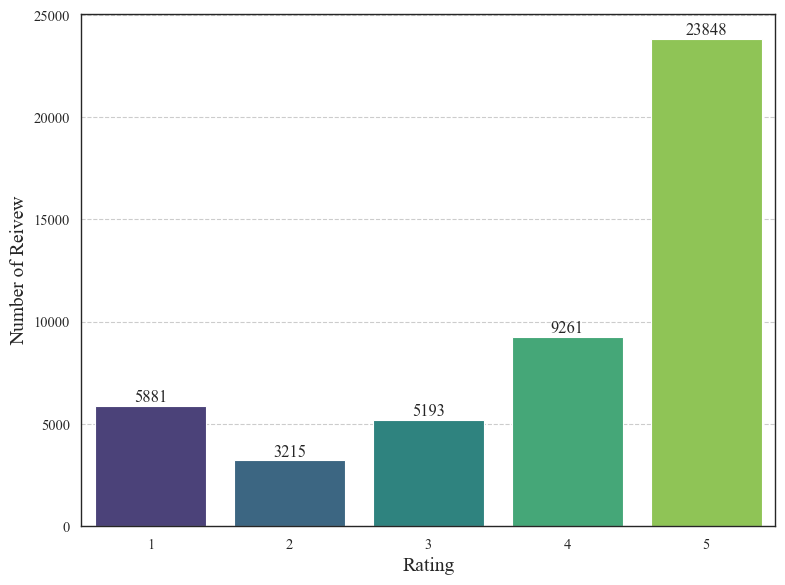

In [35]:
plt.rcParams.update({
    "figure.figsize": (8, 6),
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "font.family": "Times New Roman",
    "text.usetex": False,
    "axes.grid": True,
    "grid.color": "0.8",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
})

sns.set_context("paper", font_scale=1.2)

# Create the plot
fig, ax = plt.subplots()
ax = sns.countplot(x="Rating", data=pure_gym, palette="viridis", ax=ax)

# Add counts above each bar
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, count, ha="center", va="bottom", fontsize=12)

# Set title and axis labels
ax.set_xlabel("Rating", fontsize=14)
ax.set_ylabel("Number of Reivew", fontsize=14)

plt.tight_layout()
plt.show()

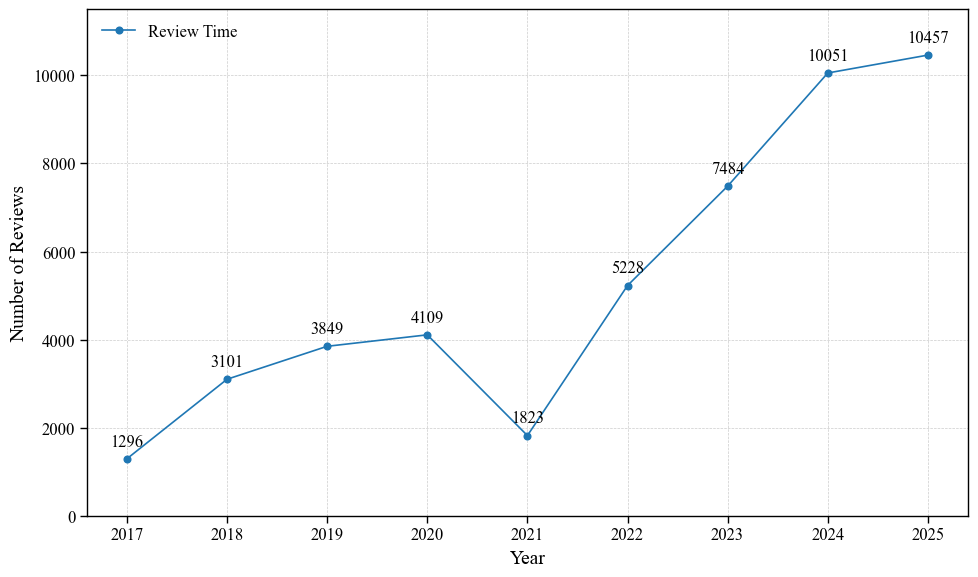

In [16]:
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "font.family": "Times New Roman",
    "text.usetex": False,
    "figure.facecolor": "white", 
    "axes.facecolor": "white",
    "grid.color": "0.8",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5
})

# Calculate counts for 'Adj Review Time'
counts_adj = pure_gym['Adj Review Time'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(counts_adj.index, counts_adj.values, marker='o', linestyle='-', label='Review Time')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

plt.xticks(counts_adj.index)
plt.ylim(0, counts_adj.max() * 1.1)

offset = counts_adj.max() * 0.02
for x, y in zip(counts_adj.index, counts_adj.values):
    plt.text(x, y + offset, f'{int(y)}', ha='center', va='bottom', fontsize=12)

plt.grid(True)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

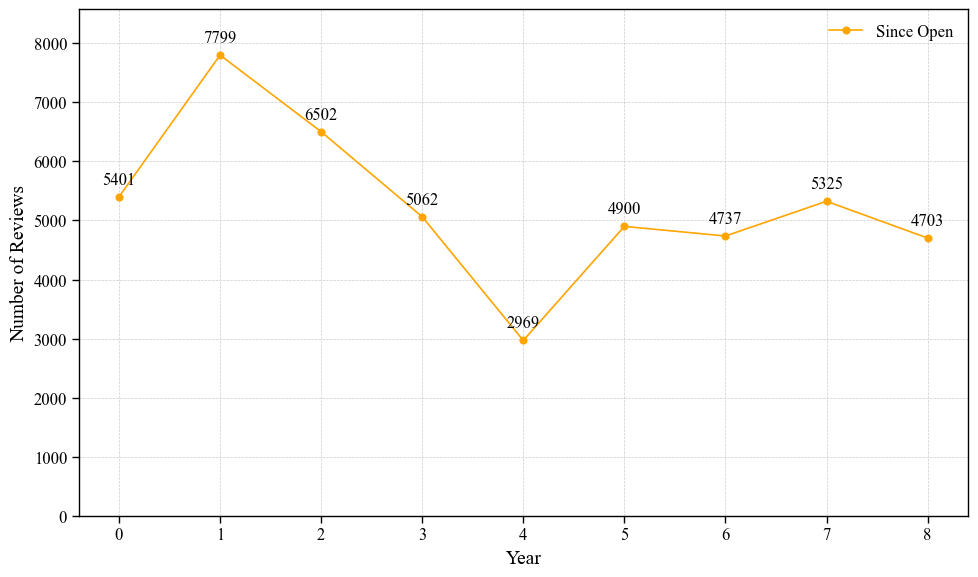

In [17]:
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "font.family": "Times New Roman",
    "text.usetex": False,
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "grid.color": "0.8",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5
})

# Calculate counts for 'Since Open'
counts_since = pure_gym['Since Open'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(counts_since.index, counts_since.values, marker='o', linestyle='-', color='orange', label='Since Open')

offset = counts_since.max() * 0.02
for x, y in zip(counts_since.index, counts_since.values):
    plt.text(x, y + offset, f'{int(y)}', ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

plt.xticks(range(0, 9))
plt.ylim(0, counts_since.max() * 1.1)

plt.grid(True)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

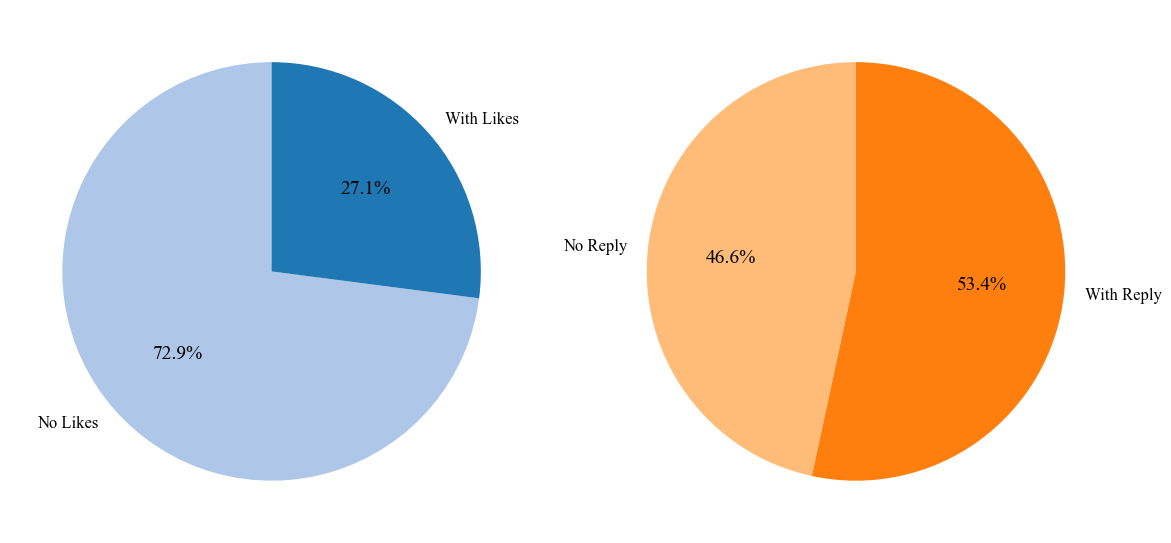

In [18]:
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "font.family": "Times New Roman",
    "text.usetex": False,
    "figure.facecolor": "white",
    "axes.facecolor": "white"
})

# Prepare Data for Likes
likes_zero = (pure_gym['Likes'] == 0).sum()
likes_non_zero = (pure_gym['Likes'] != 0).sum()
likes_data = [likes_zero, likes_non_zero]
likes_labels = ['No Likes', 'With Likes']

# If the "Reply" text is "No reply" (ignoring case and whitespace), assign 0 (No Reply), otherwise 1 (With Reply)
reply_status_mapped = pure_gym['Reply'].apply(lambda x: 0 if x.strip().lower() == 'no reply' else 1)

# Count the occurrences of each status and sort (0 then 1)
reply_status_counts = reply_status_mapped.value_counts().sort_index()

# Map the numeric values to labels: 0 -> 'No Reply', 1 -> 'With Reply'
reply_labels = ['No Reply' if status == 0 else 'With Reply' for status in reply_status_counts.index]

fig, axes = plt.subplots(1, 2)

# Pie chart for Likes
axes[0].pie(likes_data, labels=likes_labels, autopct='%1.1f%%', startangle=90, 
            colors=['#aec7e8', '#1f77b4'])

# Pie chart for Reply Status
axes[1].pie(reply_status_counts, labels=reply_labels, autopct='%1.1f%%', startangle=90, 
            colors=['#ffbb78', '#ff7f0e'])

plt.tight_layout()
plt.show()

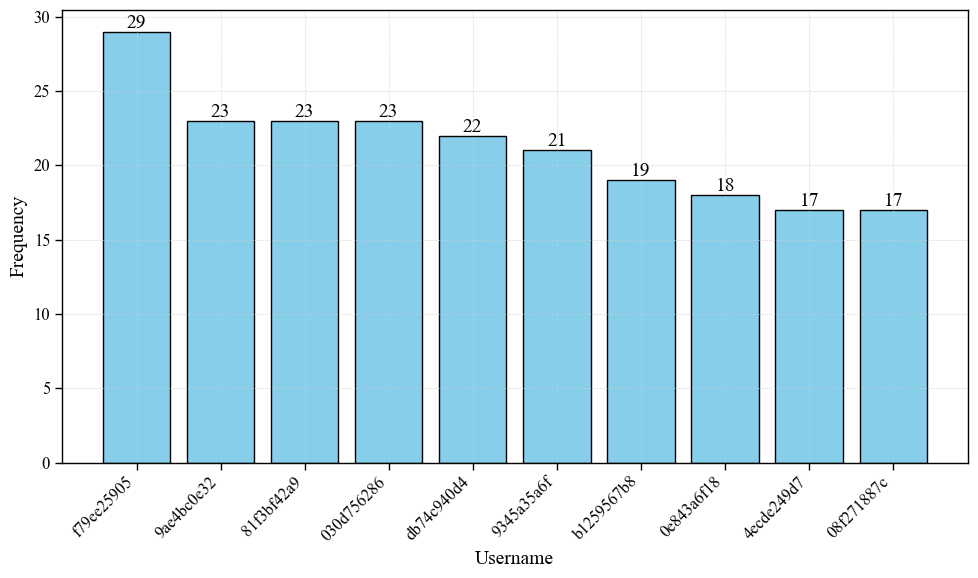

In [19]:
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "font.family": "Times New Roman",
    "text.usetex": False,
    "figure.facecolor": "white",
    "axes.facecolor": "white"
})

# Calculate the frequency of each Username and get the top 10
top_usernames = pure_gym['Username'].value_counts().head(10)

# Create a bar chart for the top 10 most frequent Usernames
fig, ax = plt.subplots()
bars = ax.bar(top_usernames.index, top_usernames.values, color="skyblue", edgecolor="black", linewidth=1)

# Annotate each bar with the exact quantity
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{int(height)}', 
        ha='center', 
        va='bottom'
    )

# Add labels, title, and grid
ax.set_xlabel('Username')
ax.set_ylabel('Frequency')
ax.set_xticklabels(top_usernames.index, rotation=45, ha='right')
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Part 2: Data Preprocessing & Feature Engineering

### Sentiment Analysis

In [20]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to compute the compound sentiment score
def get_sentiment_score(text):
    # If the text is not a string, return a neutral score of 0.0
    if not isinstance(text, str):
        return 0.0
    sentiment = sid.polarity_scores(text)
    return sentiment['compound']

pure_gym['Sentiment Score'] = pure_gym['Review'].apply(get_sentiment_score)

# Create a new column "Rating Sentiment Score" in pure_gym
# This maps a Rating of 1 to -1, 3 to 0, and 5 to 1
pure_gym["Rating Sentiment Score"] = (pure_gym["Rating"] - 3) / 2
pure_gym

,Search Query,CSV Address,Merchant Address,Username,Review,Rating,Reply,Likes,Adj Review Time,Since Open,Reply Status,Sentiment Score,Rating Sentiment Score
0,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",eaa1bd20e8,Gym its ok but a water machine not working lik...,2,No reply,0,2025,8,0,-0.8408,-0.5
1,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",b87fe80911,"It's fine, everything you need for a standard ...",3,No reply,0,2025,8,0,0.2433,0.0
2,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",093de0b0ee,"This gym used to be good, now its absolutely f...",1,"Hi Lauren, thank you for taking the time to le...",0,2025,8,1,-0.4754,-1.0
3,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",3f7513acad,When you’re fixing the water fountain ? At thi...,1,No reply,0,2025,8,0,-0.4201,-1.0
4,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",868e2638e3,"Went yesterday, Saturday 15/3, at 21.17 and th...",1,"Hi Paolo, thanks for leaving us this review. W...",0,2025,8,1,-0.5719,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47393,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",8fd905038a,Great place to go to,5,No reply,0,2018,1,0,0.6249,1.0
47394,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",17c149ae92,My favourite gym.,4,No reply,0,2017,0,0,0.0000,0.5
47395,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",347cf1167d,Love it!!,5,"Hi Iuliana! Thanks for your great review, get ...",1,2022,5,1,0.6988,1.0
47396,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",82927f51d5,Great gym for price,5,No reply,0,2017,0,0,0.6249,1.0


### Multimodal Sentiment Analysis

In [21]:
class GymDataset(Dataset):
    def __init__(self, df, tokenizer, max_length, scaler, augment=False):
        """
        df: DataFrame containing the data. (Numeric columns are assumed to be already scaled)
        tokenizer: BERT tokenizer.
        max_length: Maximum token length for reviews.
        scaler: Fitted StandardScaler for numeric features.
        augment: Not used here (no label smoothing).
        """
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.augment = augment
        # Numeric features used for training
        self.numeric_features = scaler.transform(self.df[['Likes', 'Since Open', 'Reply Status']])
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        review_text = str(row['Review'])
        # Tokenize the review with truncation/padding to max_length
        encoding = self.tokenizer.encode_plus(
            review_text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        numeric = torch.tensor(self.numeric_features[idx], dtype=torch.float)
        label = torch.tensor(float(row['Rating']), dtype=torch.float)
        
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'numeric': numeric,
            'label': label
        }

class MultimodalSentimentRegressor(nn.Module):
    def __init__(self, bert_model_name, numeric_feature_dim):
        """
        bert_model_name: Name of the pretrained BERT model.
        numeric_feature_dim: Number of numeric features.
        """
        super(MultimodalSentimentRegressor, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.text_feature_dim = self.bert.config.hidden_size
        self.numeric_feature_dim = numeric_feature_dim
        
        # Regressor: Fuse the BERT [CLS] embedding with numeric features.
        self.regressor = nn.Sequential(
            nn.Linear(self.text_feature_dim + self.numeric_feature_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 1)
        )
    
    def forward(self, input_ids, attention_mask, numeric):
        bert_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = bert_outputs.pooler_output  # [CLS] token representation
        # Concatenate text features with numeric features.
        combined = torch.cat((cls_output, numeric), dim=1)
        output = self.regressor(combined)
        return output.squeeze()

def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for batch in tqdm(dataloader, desc="Training", leave=False):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        numeric = batch['numeric'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, numeric)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * input_ids.size(0)
    epoch_loss = running_loss / len(dataloader.dataset)
    return epoch_loss

def evaluate(model, dataloader, device):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            numeric = batch['numeric'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask, numeric)
            all_preds.extend(outputs.detach().cpu().numpy())
            all_targets.extend(labels.cpu().numpy())
    
    rmse = mean_squared_error(all_targets, all_preds, squared=False)
    return rmse

def main():
    df_orig = pure_gym.copy()
    
    # Split the data:
    # Training set: rows with Likes > 0.
    # Validation set: rows with Likes == 0.
    train_df = df_orig[df_orig['Likes'] > 0].copy()
    val_df = df_orig[df_orig['Likes'] == 0].copy()
    
    # Initialize tokenizer.
    bert_model_name = 'bert-base-uncased'
    tokenizer = BertTokenizer.from_pretrained(bert_model_name)
    
    # Dynamically calculate max_length from training reviews.
    tokenized_lengths = train_df['Review'].apply(lambda x: len(tokenizer.encode(str(x), add_special_tokens=True)))
    max_length = min(int(tokenized_lengths.quantile(0.95)), 512)
    print(f"Using max token length: {max_length}")
    
    # Prepare numeric features using Z-score normalization (StandardScaler).
    numeric_columns = ['Likes', 'Since Open', 'Reply Status']
    scaler = StandardScaler()
    # Fit scaler on training data.
    train_df[numeric_columns] = scaler.fit_transform(train_df[numeric_columns])
    # Transform validation set.
    val_df[numeric_columns] = scaler.transform(val_df[numeric_columns])
    
    # For prediction on the full dataset, create a copy and transform numeric columns.
    df_pred = df_orig.copy()
    df_pred[numeric_columns] = scaler.transform(df_pred[numeric_columns])
    
    rating_counts = Counter(train_df['Rating'])
    # Normalize Likes using min-max normalization on the training data.
    likes_min = train_df['Likes'].min()
    likes_max = train_df['Likes'].max()
    def normalize_likes(x):
        return (x - likes_min) / (likes_max - likes_min) if likes_max != likes_min else 1.0

    alpha = 1.0  # Hyperparameter to control influence of Likes.
    sample_weights = [
        (1.0 / rating_counts[row['Rating']]) * (1 + alpha * normalize_likes(row['Likes']))
        for idx, row in train_df.iterrows()
    ]
    sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)
    
    # Create datasets for training and validation.
    train_dataset = GymDataset(train_df, tokenizer, max_length, scaler, augment=False)
    val_dataset = GymDataset(val_df, tokenizer, max_length, scaler, augment=False)
    
    batch_size = 16
    train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    # Model Setup.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MultimodalSentimentRegressor(bert_model_name, numeric_feature_dim=len(numeric_columns))
    model.to(device)
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=2e-5)
    
    # Training Loop.
    num_epochs = 10
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        val_rmse = evaluate(model, val_loader, device)
        print(f"Training Loss: {train_loss:.4f} | Validation RMSE: {val_rmse:.4f}")
    
    print("Starting prediction on the entire dataset...")
    pred_dataset = GymDataset(df_pred, tokenizer, max_length, scaler, augment=False)
    pred_loader = DataLoader(pred_dataset, batch_size=batch_size, shuffle=False)
    
    model.eval()
    predictions = []
    for batch in tqdm(pred_loader, desc="Predicting", leave=False):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        numeric = batch['numeric'].to(device)
        outputs = model(input_ids, attention_mask, numeric)
        predictions.extend(outputs.detach().cpu().numpy())

    df_orig['Adj Rating'] = predictions
    
    # Ensure that "Adj Rating" values less than 1 become 1 and those greater than 5 become 5.
    df_orig['Adj Rating Fixed'] = df_orig['Adj Rating'].clip(lower=1, upper=5)
    
    # Compute "Sentiment Score" as the difference from 3 so that 3 is neutral.
    df_orig['Adj Sentiment Score'] = (df_orig['Adj Rating Fixed'] - 3) / 2
    
    # Drop the "Adj Rating Fixed" column
    df_orig.drop(columns=['Adj Rating Fixed'], inplace=True)

    # Ensure the "Results" folder exists.
    os.makedirs("Results", exist_ok=True)
    output_csv = os.path.join("Results", "predictions.csv")
    # Save the original numeric columns (untouched) along with new predictions.
    df_orig.to_csv(output_csv, index=False)
    print(f"Prediction complete. Results saved to {output_csv}.")

if __name__ == "__main__":
    main()

Token indices sequence length is longer than the specified maximum sequence length for this model (713 > 512). Running this sequence through the model will result in indexing errors


Using max token length: 226

Epoch 1/10


Training Loss: 1.0685 | Validation RMSE: 0.6580

Epoch 2/10


Training Loss: 0.4206 | Validation RMSE: 0.6603

Epoch 3/10


Training Loss: 0.3313 | Validation RMSE: 0.6779

Epoch 4/10


Training Loss: 0.2270 | Validation RMSE: 0.6597

Epoch 5/10


Training Loss: 0.1879 | Validation RMSE: 0.6723

Epoch 6/10


Training Loss: 0.1630 | Validation RMSE: 0.6994

Epoch 7/10


Training Loss: 0.1249 | Validation RMSE: 0.7641

Epoch 8/10


Training Loss: 0.1071 | Validation RMSE: 0.6872

Epoch 9/10


Training Loss: 0.0979 | Validation RMSE: 0.6893

Epoch 10/10


Training Loss: 0.0883 | Validation RMSE: 0.7290
Starting prediction on the entire dataset...


Prediction complete. Results saved to Results\predictions.csv.


### Visualize emotional changes over multiple periods

In [22]:
pure_gym_new = pd.read_csv(r'Results/predictions.csv')

In [23]:
pure_gym_new

,Search Query,CSV Address,Merchant Address,Username,Review,Rating,Reply,Likes,Adj Review Time,Since Open,Reply Status,Sentiment Score,Rating Sentiment Score,Adj Rating,Adj Sentiment Score
0,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",eaa1bd20e8,Gym its ok but a water machine not working lik...,2,No reply,0,2025,8,0,-0.8408,-0.5,1.798172,-0.600914
1,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",b87fe80911,"It's fine, everything you need for a standard ...",3,No reply,0,2025,8,0,0.2433,0.0,2.532080,-0.233960
2,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",093de0b0ee,"This gym used to be good, now its absolutely f...",1,"Hi Lauren, thank you for taking the time to le...",0,2025,8,1,-0.4754,-1.0,1.043321,-0.978340
3,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",3f7513acad,When you’re fixing the water fountain ? At thi...,1,No reply,0,2025,8,0,-0.4201,-1.0,1.039237,-0.980382
4,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",868e2638e3,"Went yesterday, Saturday 15/3, at 21.17 and th...",1,"Hi Paolo, thanks for leaving us this review. W...",0,2025,8,1,-0.5719,-1.0,1.894448,-0.552776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47393,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",8fd905038a,Great place to go to,5,No reply,0,2018,1,0,0.6249,1.0,5.052926,1.000000
47394,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",17c149ae92,My favourite gym.,4,No reply,0,2017,0,0,0.0000,0.5,5.059004,1.000000
47395,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",347cf1167d,Love it!!,5,"Hi Iuliana! Thanks for your great review, get ...",1,2022,5,1,0.6988,1.0,4.991656,0.995828
47396,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",82927f51d5,Great gym for price,5,No reply,0,2017,0,0,0.6249,1.0,4.847464,0.923732


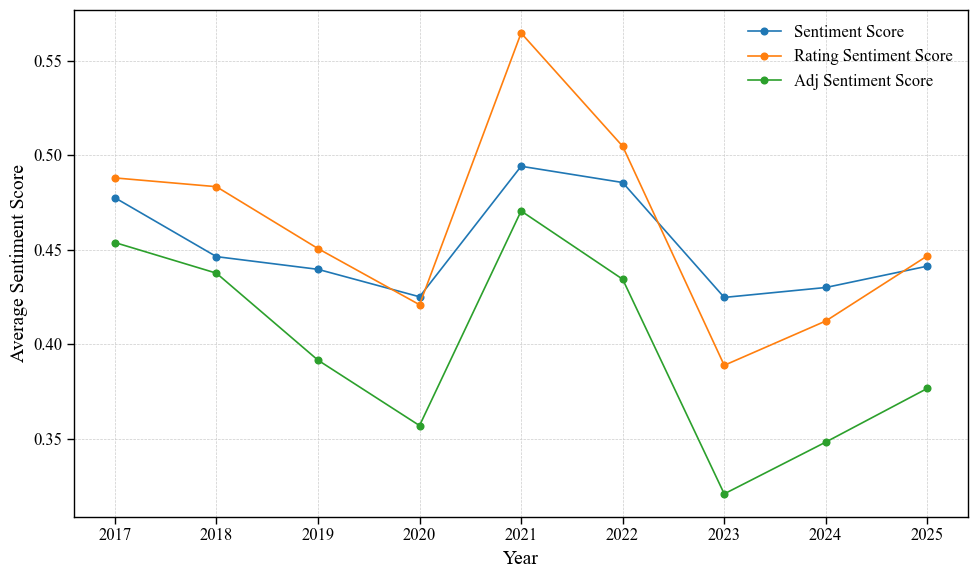

In [24]:
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "font.family": "Times New Roman",
    "text.usetex": False,
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "grid.color": "0.8",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5
})

# Calculate the mean for each sentiment measure grouped by "Adj Review Time"
avg_sentiment = pure_gym_new.groupby("Adj Review Time")["Sentiment Score"].mean()
avg_rating_sentiment = pure_gym_new.groupby("Adj Review Time")["Rating Sentiment Score"].mean()
avg_adj_sentiment = pure_gym_new.groupby("Adj Review Time")["Adj Sentiment Score"].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_sentiment.index, avg_sentiment.values, marker='o', linestyle='-', label="Sentiment Score")
plt.plot(avg_rating_sentiment.index, avg_rating_sentiment.values, marker='o', linestyle='-', label="Rating Sentiment Score")
plt.plot(avg_adj_sentiment.index, avg_adj_sentiment.values, marker='o', linestyle='-', label="Adj Sentiment Score")

# Add labels and title with increased font sizes and padding
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)

plt.xticks(avg_sentiment.index)
plt.yticks(fontsize=12)

plt.grid(True)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

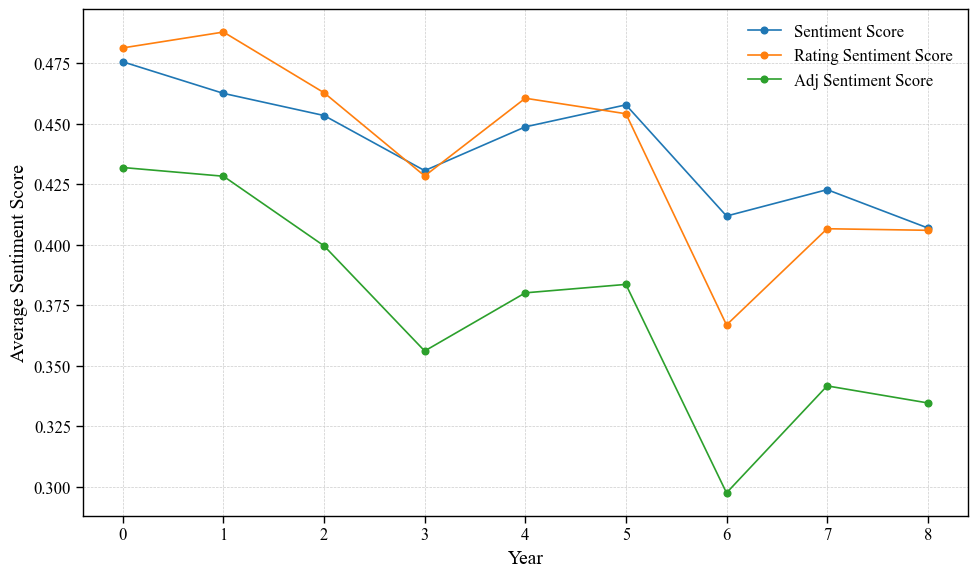

In [25]:
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "font.family": "Times New Roman",
    "text.usetex": False,
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "grid.color": "0.8",
    "grid.linestyle": "--", 
    "grid.linewidth": 0.5
})

# Calculate the mean for each sentiment measure grouped by "Since Open"
avg_sentiment = pure_gym_new.groupby("Since Open")["Sentiment Score"].mean()
avg_rating_sentiment = pure_gym_new.groupby("Since Open")["Rating Sentiment Score"].mean()
avg_adj_sentiment = pure_gym_new.groupby("Since Open")["Adj Sentiment Score"].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_sentiment.index, avg_sentiment.values, marker='o', linestyle='-', label="Sentiment Score")
plt.plot(avg_rating_sentiment.index, avg_rating_sentiment.values, marker='o', linestyle='-', label="Rating Sentiment Score")
plt.plot(avg_adj_sentiment.index, avg_adj_sentiment.values, marker='o', linestyle='-', label="Adj Sentiment Score")

# Add labels and title with enhanced styling
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)

plt.xticks(range(0, 9))
plt.grid(True)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

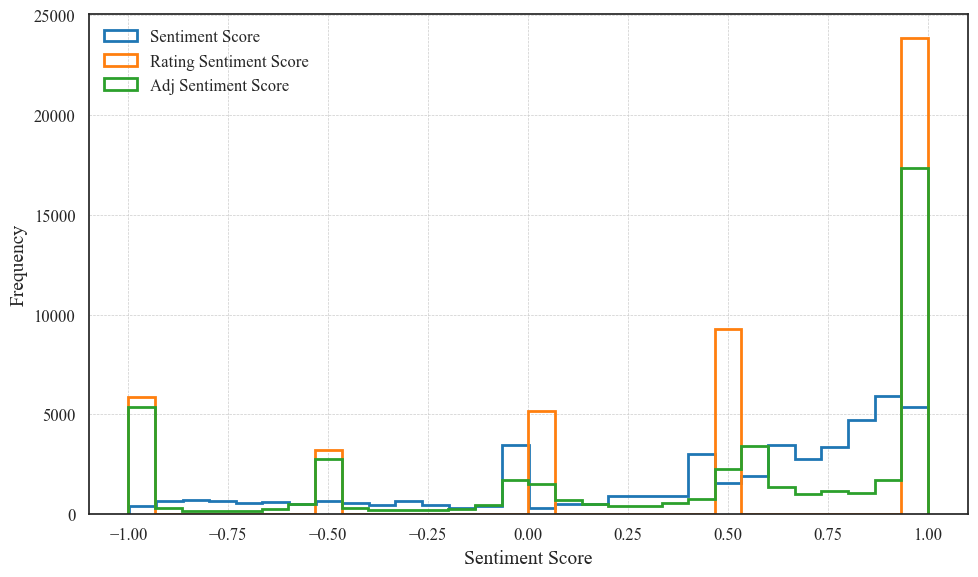

In [34]:
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "font.family": "Times New Roman",
    "text.usetex": False,
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "grid.color": "0.8",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5
})

bins = 30  # Number of bins for the histogram

plt.figure(figsize=(10, 6))
plt.hist(pure_gym_new['Sentiment Score'], bins=bins, histtype='step', linewidth=2,
         label='Sentiment Score', color='tab:blue')
plt.hist(pure_gym_new['Rating Sentiment Score'], bins=bins, histtype='step', linewidth=2,
         label='Rating Sentiment Score', color='tab:orange')
plt.hist(pure_gym_new['Adj Sentiment Score'], bins=bins, histtype='step', linewidth=2,
         label='Adj Sentiment Score', color='tab:green')

# Add axis labels and title
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")

plt.grid(True)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

### Dynamic Topic Modelling

In [27]:
# Set up NLTK stopwords and add custom ones
stop_words = set(stopwords.words('english'))
custom_stopwords = ['gym', 'gyms', 'pure', 'puregym', 'puregyms']
stop_words.update(word.lower() for word in custom_stopwords)

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    """
    Convert POS tag from nltk.pos_tag to a format recognized by WordNetLemmatizer.
    """
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # Remove URLs
    text = re.sub(r'https?:\/\/\S+', '', text)
    # Remove punctuation and numbers (keep only letters and whitespace)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords and tokens with a single character
    words = [word for word in words if word not in stop_words and len(word) > 1]
    # POS tagging
    pos_tags = nltk.pos_tag(words)
    # Lemmatize tokens using the correct POS tag
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    # Rejoin tokens into a cleaned string and remove extra whitespace
    filtered_text = re.sub(r'\s+', ' ', ' '.join(words)).strip()
    return filtered_text

pure_gym_new['Clean Review'] = pure_gym_new['Review'].astype(str).apply(preprocess_text)

In [28]:
# Generate embeddings from the cleaned text
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(pure_gym_new['Clean Review'].tolist(), show_progress_bar=True)

# Fit BERTopic model
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(pure_gym_new['Clean Review'].tolist(), embeddings)
pure_gym_new['Topic Id'] = topics

# Create topic labels
topics_info = topic_model.get_topic_info()
topic_label_dict = {}
for topic_id in topics_info.Topic:
    if topic_id == -1:
        topic_label_dict[topic_id] = "Outliers"
    else:
        top_words = topic_model.get_topic(topic_id)
        if top_words:
            label_words = [w for w, _ in top_words[:2]]
            topic_label = " ".join(label_words)
            topic_label_dict[topic_id] = topic_label
        else:
            topic_label_dict[topic_id] = "No_Top_Words"

pure_gym_new['Topic'] = pure_gym_new['Topic Id'].map(topic_label_dict)

# Aggregation and export (Years as columns, without outputting a separate Rank column)
filtered_df = pure_gym_new[pure_gym_new['Topic'] != "Outliers"]
grouped = filtered_df.groupby(['Adj Review Time', 'Topic']).size().reset_index(name='count')
all_years = sorted(filtered_df['Adj Review Time'].unique())

max_rank = 10
rank_data = {f"Rank {i+1}": [] for i in range(max_rank)}

for year in all_years:
    year_df = grouped[grouped['Adj Review Time'] == year]
    top_topics = year_df.sort_values('count', ascending=False).head(max_rank)['Topic'].tolist()
    # Pad with None if fewer than max_rank topics
    top_topics += [None] * (max_rank - len(top_topics))
    for i in range(max_rank):
        rank_data[f"Rank {i+1}"].append(top_topics[i])

result_df = pd.DataFrame(rank_data, index=all_years).transpose()
result_df.columns.name = "Year"

result_df.reset_index(drop=True, inplace=True)

result_df.to_csv(r"Results/top_10_topics_by_year.csv", index=False)
print("Reversed format saved to 'top_10_topics_by_year.csv'")

Batches:   0%|          | 0/1482 [00:00<?, ?it/s]

2025-04-01 00:04:32,672 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-01 00:05:03,119 - BERTopic - Dimensionality - Completed ✓
2025-04-01 00:05:03,121 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-01 00:05:06,498 - BERTopic - Cluster - Completed ✓
2025-04-01 00:05:06,507 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-01 00:05:07,394 - BERTopic - Representation - Completed ✓


Reversed format saved to 'top_10_topics_by_year.csv'


In [29]:
pure_gym_new

,Search Query,CSV Address,Merchant Address,Username,Review,Rating,Reply,Likes,Adj Review Time,Since Open,Reply Status,Sentiment Score,Rating Sentiment Score,Adj Rating,Adj Sentiment Score,Clean Review,Topic Id,Topic
0,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",eaa1bd20e8,Gym its ok but a water machine not working lik...,2,No reply,0,2025,8,0,-0.8408,-0.5,1.798172,-0.600914,ok water machine work like week another water ...,-1,Outliers
1,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",b87fe80911,"It's fine, everything you need for a standard ...",3,No reply,0,2025,8,0,0.2433,0.0,2.532080,-0.233960,fine everything need standard goer good youre ...,-1,Outliers
2,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",093de0b0ee,"This gym used to be good, now its absolutely f...",1,"Hi Lauren, thank you for taking the time to le...",0,2025,8,1,-0.4754,-1.0,1.043321,-0.978340,use good absolutely filthy get rid anti bac sp...,18,towel spray
3,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",3f7513acad,When you’re fixing the water fountain ? At thi...,1,No reply,0,2025,8,0,-0.4201,-1.0,1.039237,-0.980382,youre fix water fountain point feel youre keep...,-1,Outliers
4,PureGym Aberdeen Kittybrewster,"Kittybrewster Retail Park, Bedford Road, AB24 3LJ","kittybrewster retail park, Bedford Rd, Aberdee...",868e2638e3,"Went yesterday, Saturday 15/3, at 21.17 and th...",1,"Hi Paolo, thanks for leaving us this review. W...",0,2025,8,1,-0.5719,-1.0,1.894448,-0.552776,go yesterday saturday shut never receive email...,-1,Outliers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47393,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",8fd905038a,Great place to go to,5,No reply,0,2018,1,0,0.6249,1.0,5.052926,1.000000,great place go,81,place great
47394,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",17c149ae92,My favourite gym.,4,No reply,0,2017,0,0,0.0000,0.5,5.059004,1.000000,favourite,402,favourite favorite
47395,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",347cf1167d,Love it!!,5,"Hi Iuliana! Thanks for your great review, get ...",1,2022,5,1,0.6988,1.0,4.991656,0.995828,love,39,love loveit
47396,PureGym York,"Stirling Road, YO30 4TU","Stirling Rd, York YO30 4TU",82927f51d5,Great gym for price,5,No reply,0,2017,0,0,0.6249,1.0,4.847464,0.923732,great price,269,price plaace


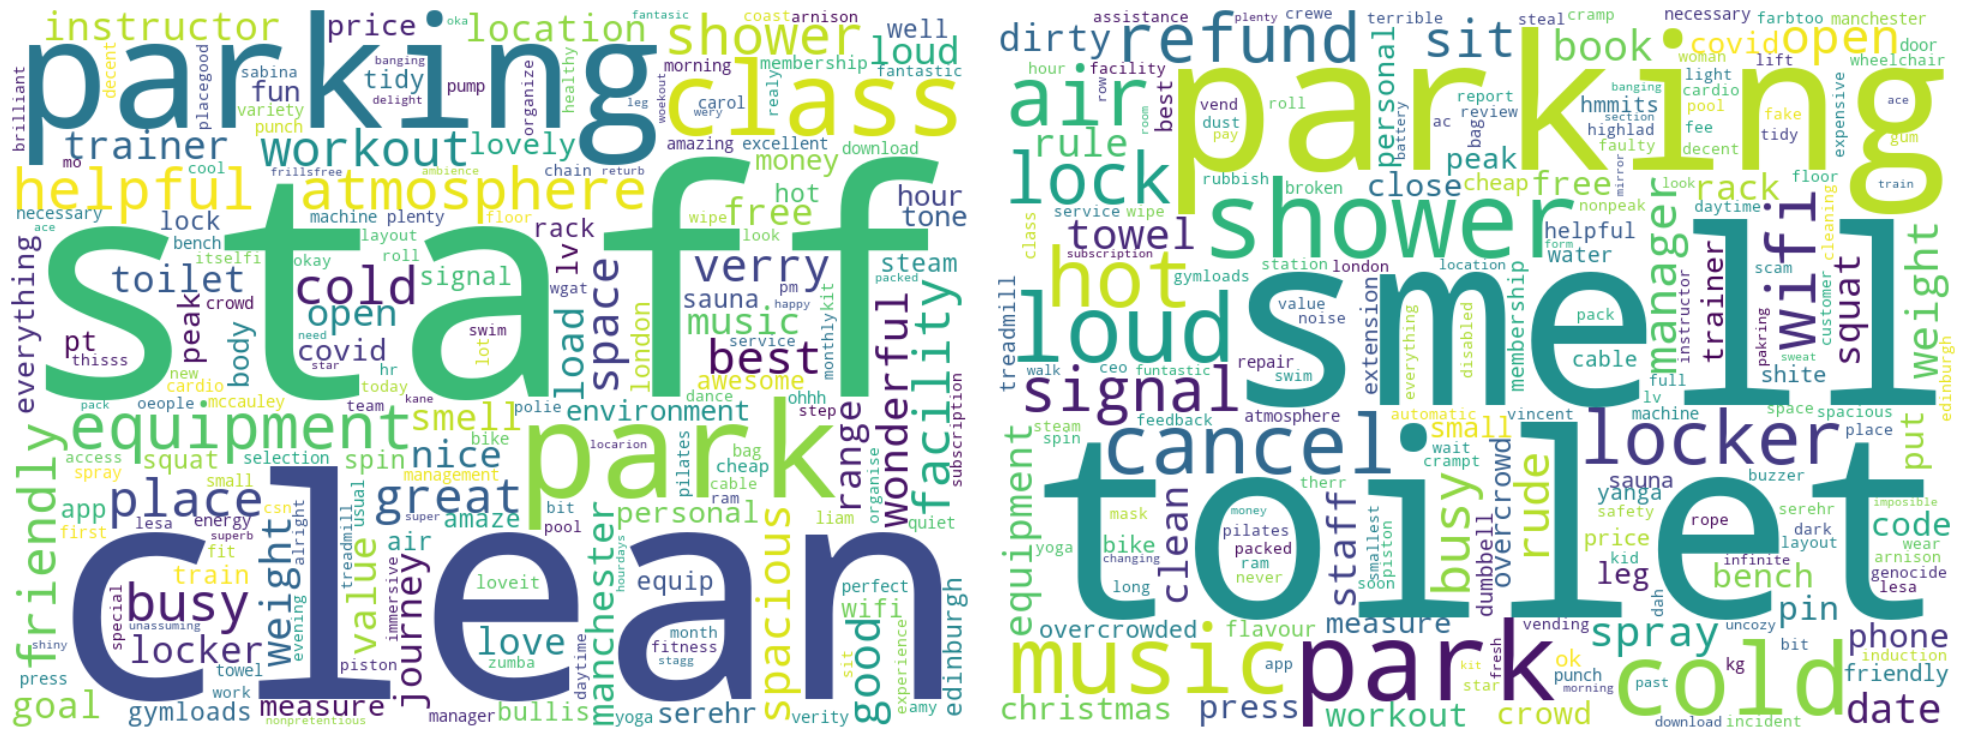

In [30]:
plt.rcParams.update({
    "figure.figsize": (20, 10),
    "font.size": 18,
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "legend.fontsize": 16,
    "font.family": "Times New Roman", 
    "figure.facecolor": "white",
    "axes.facecolor": "white"
})

# Remove rows where the topic is "Outliers"
filtered_df = pure_gym_new[pure_gym_new["Topic"] != "Outliers"]

positive_df = filtered_df[filtered_df["Adj Sentiment Score"] > 0]
negative_df = filtered_df[filtered_df["Adj Sentiment Score"] < 0]

positive_text = " ".join(positive_df["Topic"].astype(str))
negative_text = " ".join(negative_df["Topic"].astype(str))

positive_wc = WordCloud(width=800, height=600, background_color='white',
                        max_words=200, collocations=False).generate(positive_text)
negative_wc = WordCloud(width=800, height=600, background_color='white',
                        max_words=200, collocations=False).generate(negative_text)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot the positive sentiment word cloud
axs[0].imshow(positive_wc, interpolation='bilinear')
axs[0].axis("off")

# Plot the negative sentiment word cloud
axs[1].imshow(negative_wc, interpolation='bilinear')
axs[1].axis("off")

plt.tight_layout()
plt.show()

In [31]:
df = pd.read_csv(r'Results/top_10_topics_by_year.csv')

# Adjust the index so it starts at 1
df.index = range(1, len(df) + 1)
df

,2017,2018,2019,2020,2021,2022,2023,2024,2025
1,parking park,parking park,parking park,parking park,covid measure,parking park,parking park,parking park,smell toilet
2,shower cold,shower cold,shower cold,shower cold,parking park,covid measure,smell toilet,smell toilet,parking park
3,staff helpful,sauna steam,smell toilet,smell toilet,clean staff,clean staff,shower cold,shower cold,shower cold
4,sauna steam,weight free,great wonderful,music loud,clean equipment,smell toilet,music loud,music loud,music loud
5,weight free,smell toilet,music loud,locker lock,clean friendly,shower cold,clean staff,air hot,goal journey
6,clean staff,peak busy,good verry,good verry,good verry,music loud,wifi signal,clean staff,air hot
7,clean equipment,good verry,staff helpful,staff helpful,towel spray,wifi signal,air hot,locker lock,good verry
8,peak busy,value money,weight free,great wonderful,shower cold,air hot,locker lock,instructor fun,staff helpful
9,locker lock,busy equipment,manchester best,weight free,spacious space,clean equipment,clean friendly,clean equipment,locker lock
10,pool swim,staff helpful,clean staff,peak busy,cancel refund,good verry,clean equipment,good verry,tone body


In [32]:
# Extract all unique phrases from the DataFrame
all_phrases = df.values.ravel()

# Encode each unique phrase as a numeric label
label_encoder = LabelEncoder()
encoded_vals = label_encoder.fit_transform(all_phrases)

# Build a dictionary: phrase -> numeric code
phrase_to_code = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

df_encoded = df.replace(phrase_to_code)

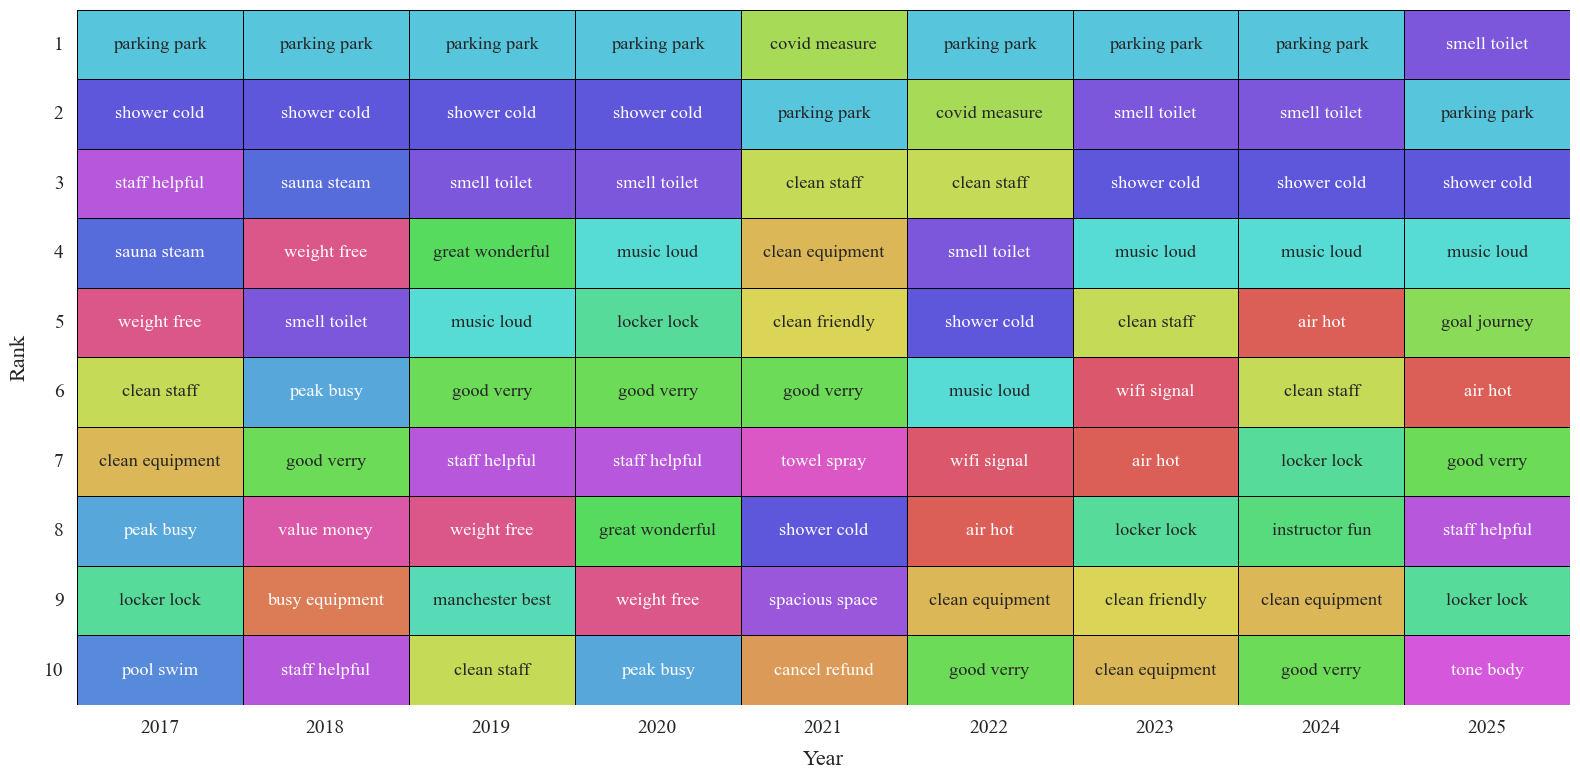

In [33]:
num_phrases = len(label_encoder.classes_)
color_palette = sns.color_palette("hls", num_phrases)

plt.figure(figsize=(16, 8))

sns.set_theme(style="white", font="Times New Roman", font_scale=1.1)

ax = sns.heatmap(
    df_encoded,
    annot=df.values,
    fmt="",
    cmap=color_palette,
    cbar=False,
    linewidths=0.5,
    linecolor="black"
)

# Add title and axis labels
ax.set_xlabel("Year", fontsize=16, labelpad=10)
ax.set_ylabel("Rank", fontsize=16, labelpad=10)

# Set tick labels to the DataFrame's column names (years) and row indices (rankings)
ax.set_xticklabels(df.columns, rotation=0, fontsize=14)
ax.set_yticklabels(df.index, rotation=0, fontsize=14)

plt.tight_layout()
plt.show()